In [2]:
from pathlib import Path
import scipy
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tqdm import tqdm
import scipy.stats as stats
from scipy.interpolate import InterpolatedUnivariateSpline, BSpline, CubicSpline, make_lsq_spline, make_interp_spline

In [3]:
file = r"../data/SSCURVES(1-61).xlsx"

In [4]:
sheet = pd.read_excel(file, sheet_name=0, header=0)

In [5]:
def sigmoid (x, A, h, slope, C):
    """https://stackoverflow.com/a/55104465"""
    return 1 / (1 + np.exp ((x - h) / slope)) *  A + C

(0.0, 12.0)

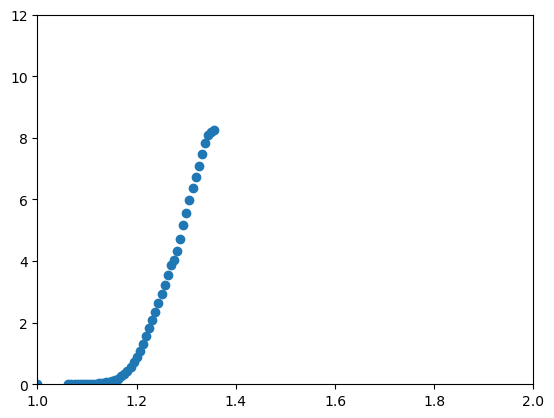

In [6]:
x_data = sheet['Strain']
y_data = sheet['Stress']
plt.scatter(x_data, y_data)
plt.xlim([1, 2])
plt.ylim([0, 12])

(0.0, 12.0)

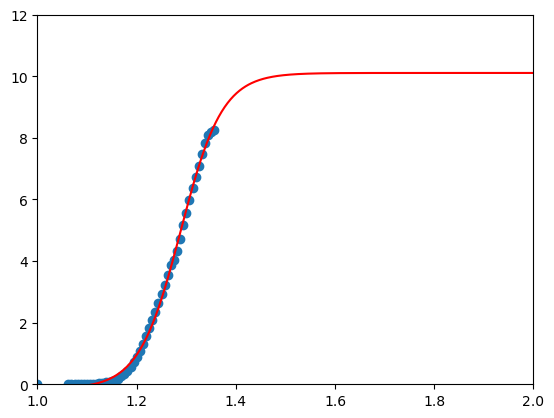

In [7]:
# Fitting the model.
popt, pcov = curve_fit(sigmoid, x_data, y_data)

# Display model fit.
x = np.linspace(0, 2, 1000)
plt.scatter(x_data, y_data)
plt.plot(x, sigmoid(x, *popt), 'r-', label='fit: A=%5.3f, H=%5.3f, slope=%5.3f, c=%5.3f' % tuple(popt))
plt.xlim([1, 2])
plt.ylim([0, 12])

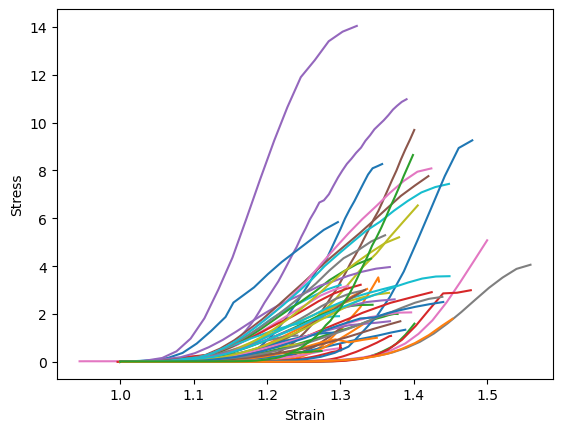

In [9]:
xls = pd.ExcelFile(file)
for sheet in xls.sheet_names:
    
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.groupby("Strain", as_index=False).agg('mean', numeric_only=True)
    df = df.dropna(subset=['Strain', 'Stress'])

    if len(df) < 15:
        continue

    x_data = df['Strain']
    y_data = df['Stress']
    plt.xlabel("Strain")
    plt.ylabel("Stress")
    plt.plot(x_data, y_data, label=sheet)

plt.legend()
plt.show()

 12%|█▏        | 6/49 [00:00<00:05,  8.40it/s]

Duplicate strain entries found for sheet 5. Not calculating spline
Duplicate strain entries found for sheet 6. Not calculating spline


 16%|█▋        | 8/49 [00:00<00:04,  8.40it/s]

Duplicate strain entries found for sheet 7. Not calculating spline
Duplicate strain entries found for sheet 9. Not calculating spline


 24%|██▍       | 12/49 [00:01<00:04,  8.72it/s]

Duplicate strain entries found for sheet 11. Not calculating spline
Duplicate strain entries found for sheet 12. Not calculating spline


 35%|███▍      | 17/49 [00:02<00:04,  7.30it/s]

Duplicate strain entries found for sheet 16. Not calculating spline
Duplicate strain entries found for sheet 17. Not calculating spline


 57%|█████▋    | 28/49 [00:03<00:02,  8.95it/s]

Duplicate strain entries found for sheet 27. Not calculating spline
Duplicate strain entries found for sheet 28. Not calculating spline


 63%|██████▎   | 31/49 [00:03<00:02,  8.52it/s]

Duplicate strain entries found for sheet 30. Not calculating spline


 67%|██████▋   | 33/49 [00:04<00:02,  6.45it/s]

Duplicate strain entries found for sheet 32. Not calculating spline


 71%|███████▏  | 35/49 [00:04<00:02,  6.45it/s]

Duplicate strain entries found for sheet 34. Not calculating spline


 78%|███████▊  | 38/49 [00:04<00:01,  7.48it/s]

Duplicate strain entries found for sheet 37. Not calculating spline


100%|██████████| 49/49 [00:06<00:00,  7.90it/s]


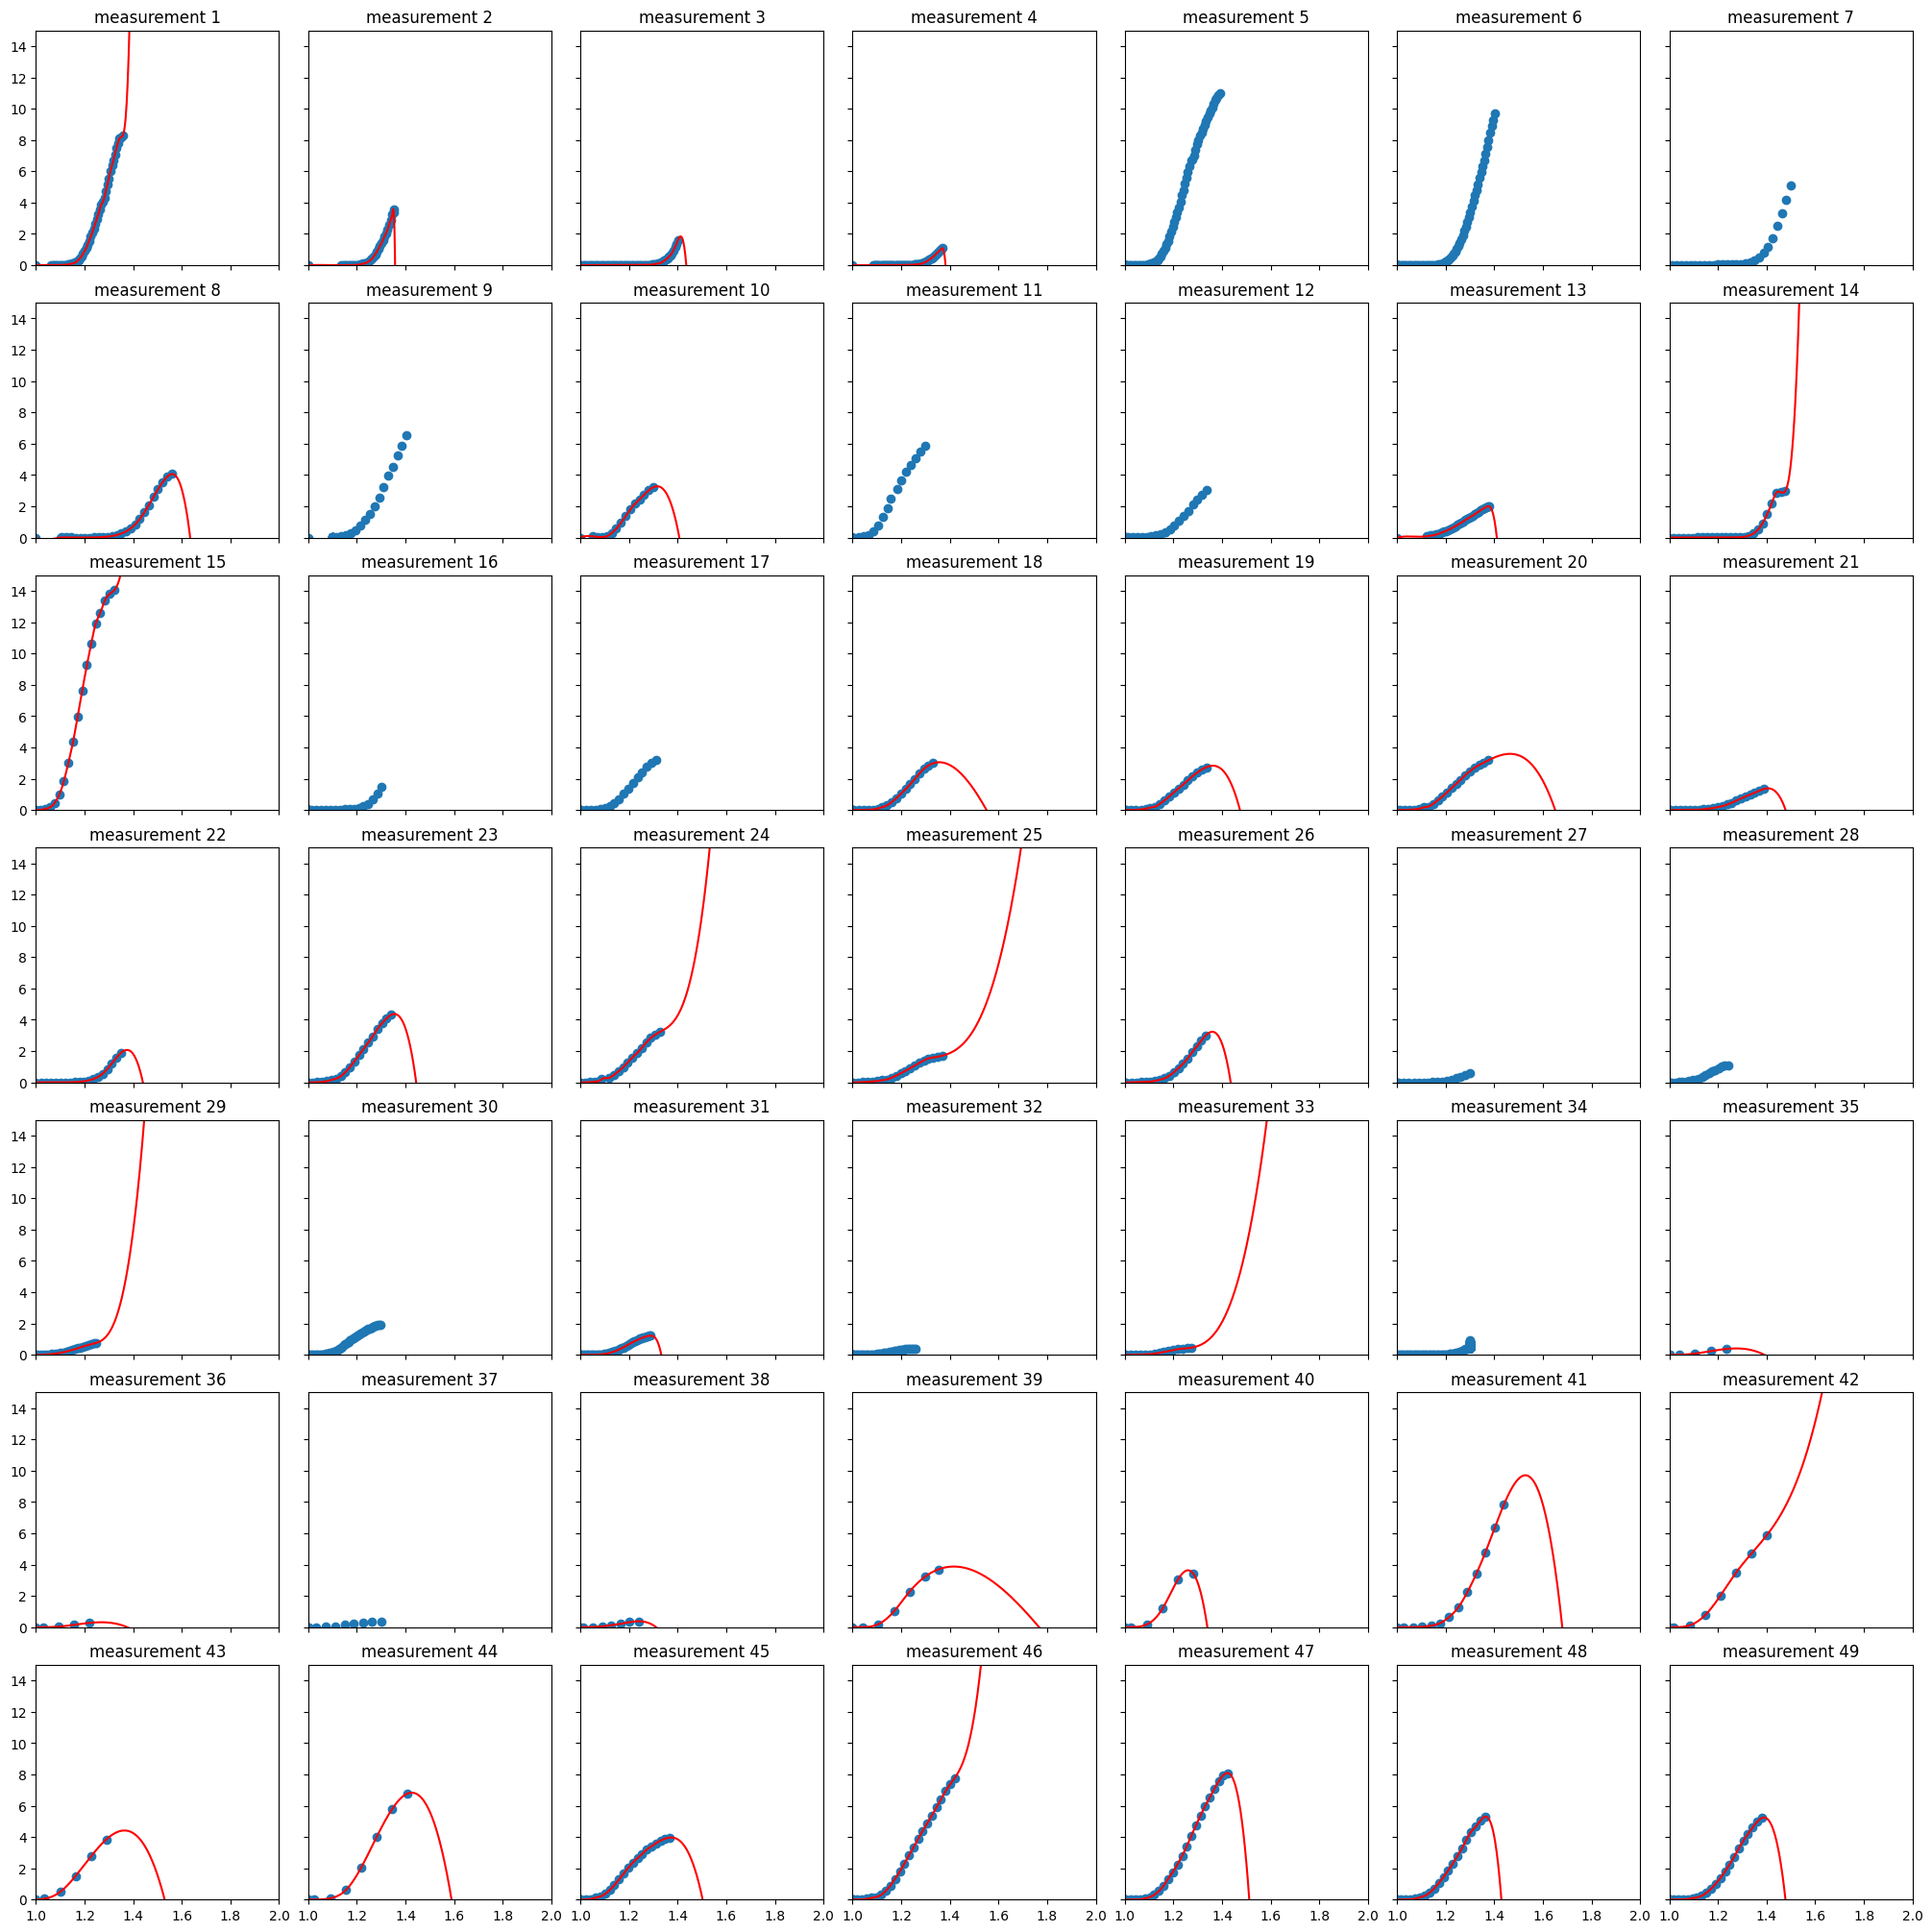

In [28]:
xls = pd.ExcelFile(file)
num_of_rows_cols = int(np.sqrt(len(xls.sheet_names)))

x = np.linspace(0, 2, 1000)

fig, axs = plt.subplots(ncols=num_of_rows_cols, nrows=num_of_rows_cols, figsize=(20, 20),
                        layout="constrained", sharex=True, sharey=True)

for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=num_of_rows_cols**2):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    x_data = df['Strain']
    y_data = df['Stress']
    ax.scatter(x_data, y_data)

    if not all(i < j for i, j in zip(x_data, x_data[1:])):
        print(f"Duplicate strain entries found for sheet {sheet}. Not calculating spline")
    else:
        # To make a spline. Doesn't work. Expects always increasing strain.
        # t = [-1, 0, 1]
        # k=3
        # t = np.r_[(x[0],) * (k+1), t, (x[-1],) * (k+1)]

        spl = InterpolatedUnivariateSpline(x_data, y_data)
        ax.plot(x, spl(x), 'r-')
        
    #     ax.plot(x, spl(x), 'r-')

    # To fit a sigmoid.
    # popt, pcov = curve_fit(sigmoid, x_data, y_data, maxfev=10000)
    # ax.plot(x, sigmoid(x, *popt), '-', label='fit: A=%5.3f, H=%5.3f, slope=%5.3f, c=%5.3f' % tuple(popt))

    ax.set_title(f"measurement {sheet}")
    ax.set_xlim([1, 2])
    ax.set_ylim([0, 15])

plt.show()
    

100%|██████████| 49/49 [00:23<00:00,  2.10it/s]


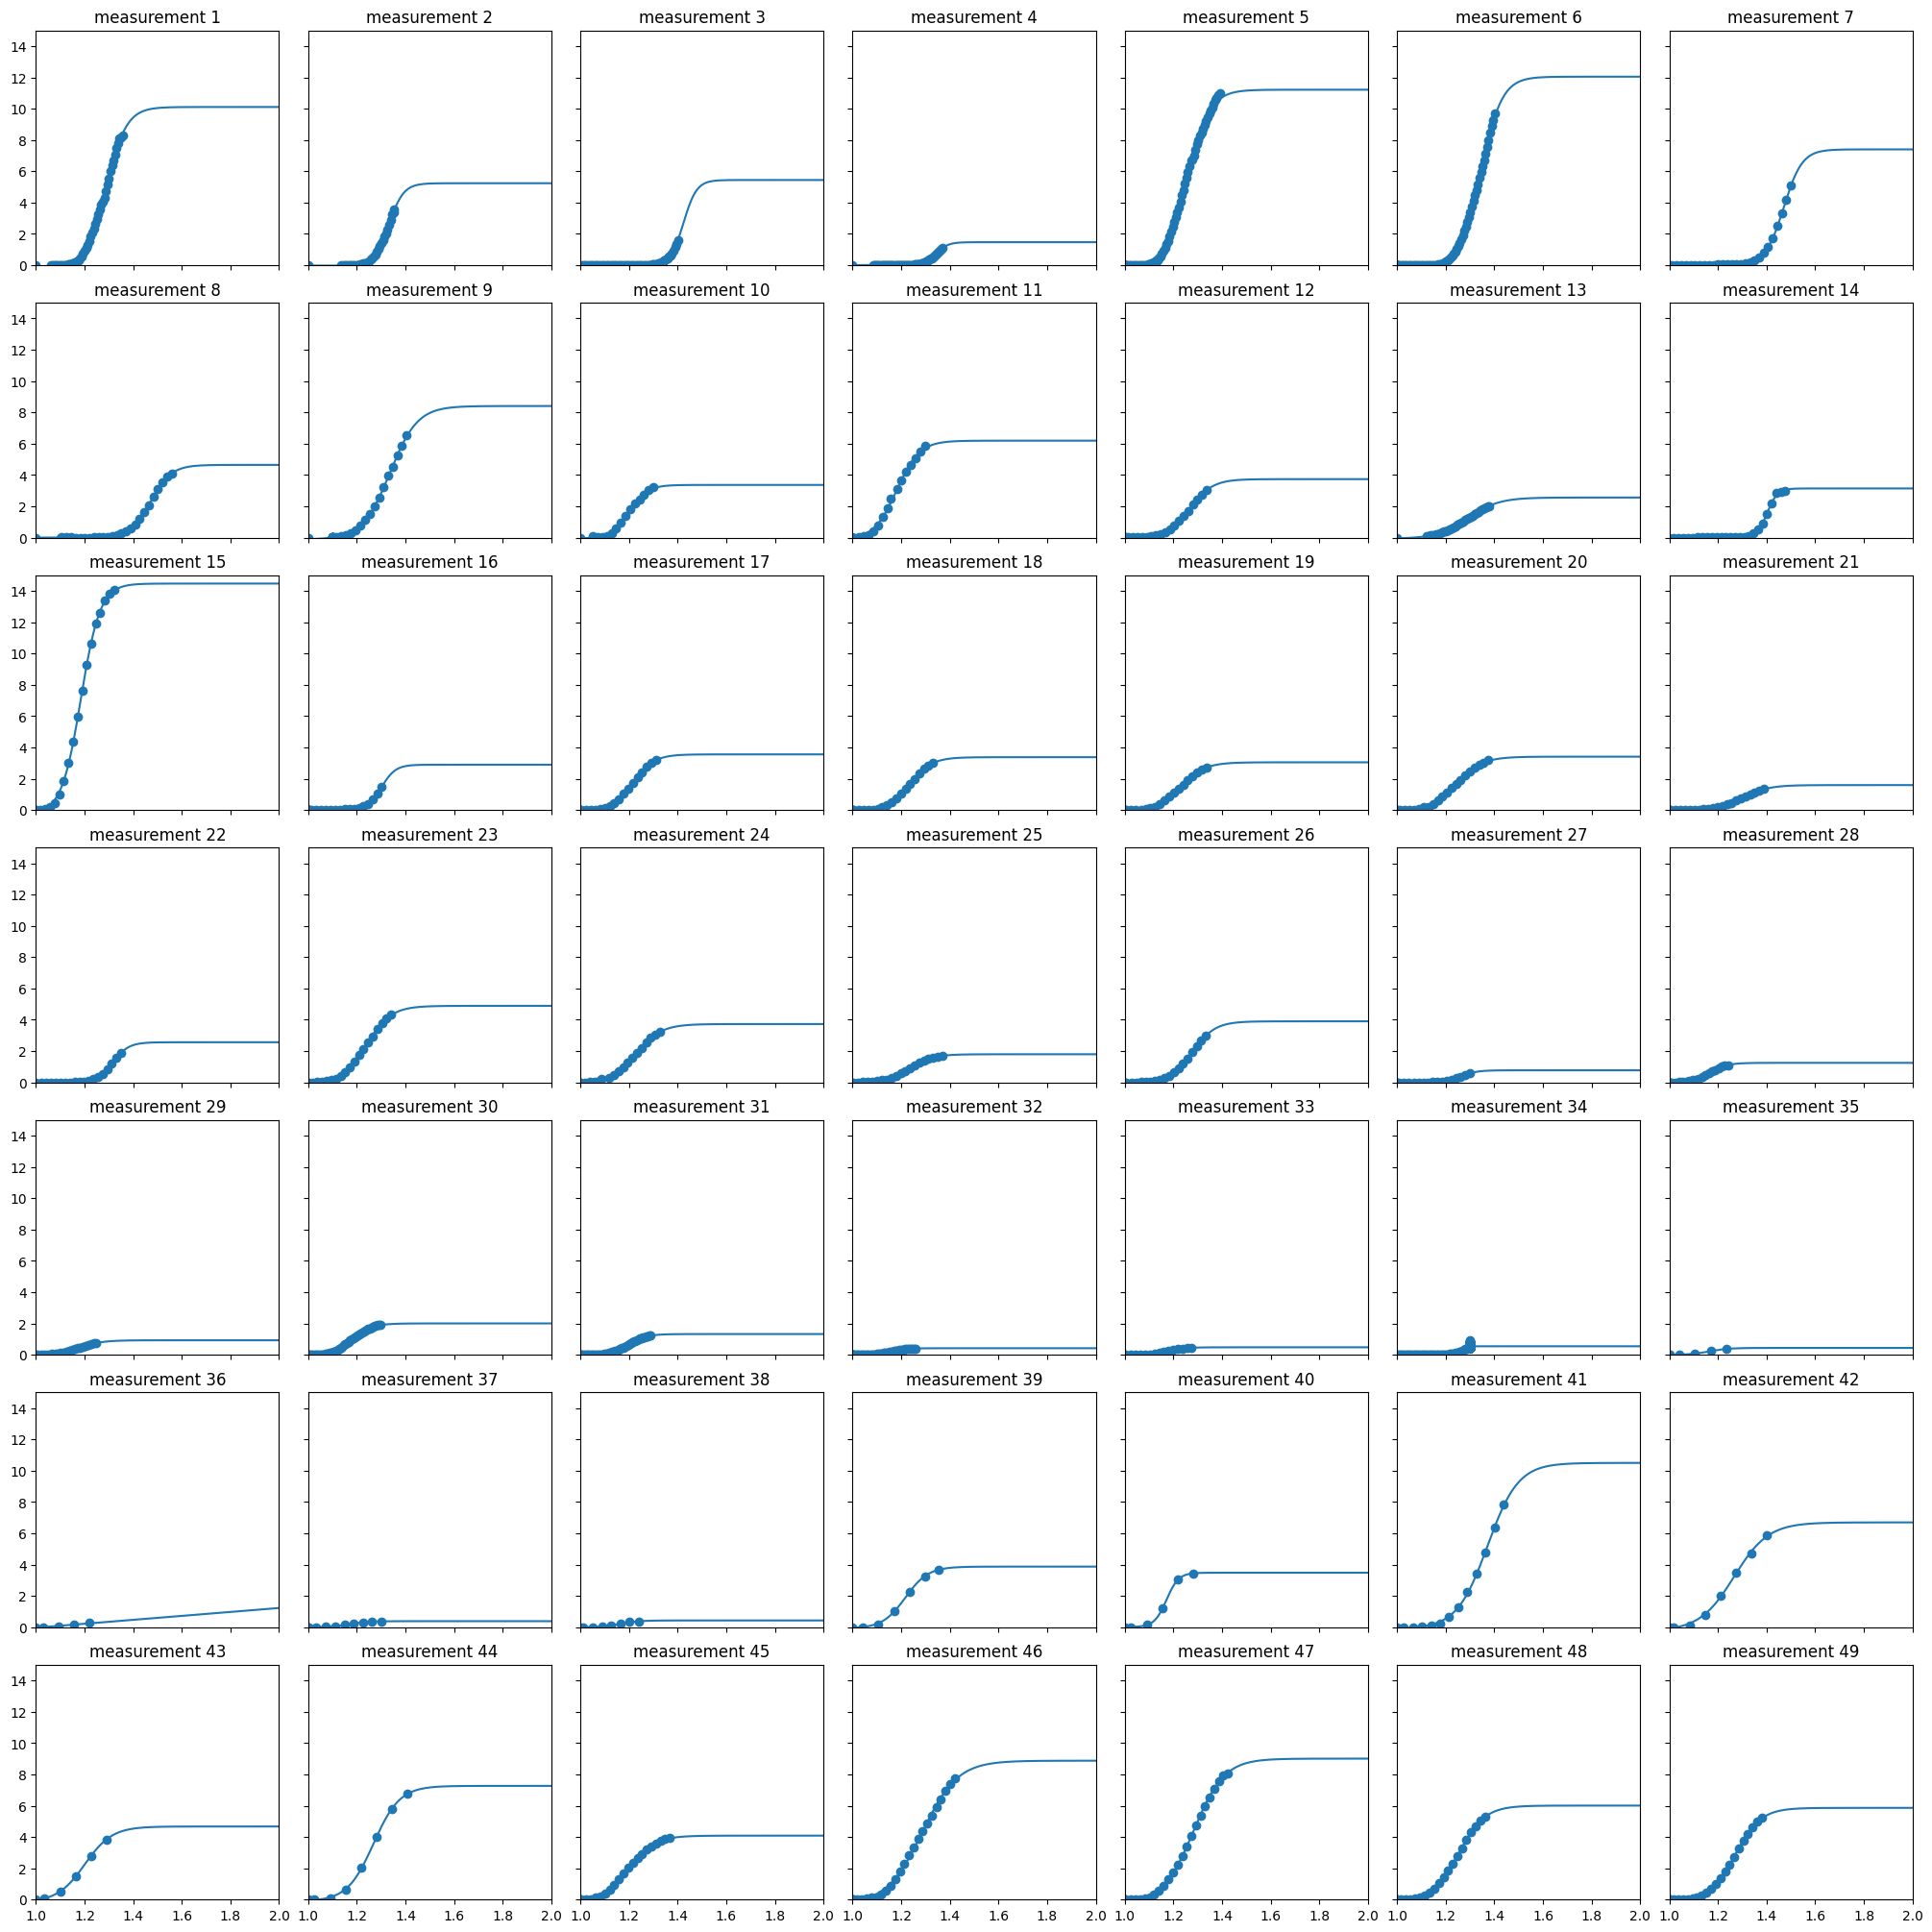

In [29]:
xls = pd.ExcelFile(file)
num_of_rows_cols = int(np.sqrt(len(xls.sheet_names)))

x = np.linspace(0, 2, 1000)

fig, axs = plt.subplots(ncols=num_of_rows_cols, nrows=num_of_rows_cols, figsize=(20, 20),
                        layout="constrained", sharex=True, sharey=True)

for sheet, ax in tqdm(zip(xls.sheet_names, axs.flat), total=num_of_rows_cols**2):
    df = pd.read_excel(file, sheet_name=sheet)
    df = df.dropna(subset=['Strain', 'Stress'])

    x_data = df['Strain']
    y_data = df['Stress']
    ax.scatter(x_data, y_data)

    # if not all(i < j for i, j in zip(x_data, x_data[1:])):
    #     print(f"Duplicate strain entries found for sheet {sheet}. Not calculating spline")
    # else:
    #     # To make a spline. Doesn't work. Expects always increasing strain.
    #     # t = [-1, 0, 1]
    #     # k=3
    #     # t = np.r_[(x[0],) * (k+1), t, (x[-1],) * (k+1)]

    #     spl = InterpolatedUnivariateSpline(x_data, y_data)
    #     ax.plot(x, spl(x), 'r-')
        
    #     ax.plot(x, spl(x), 'r-')

    # To fit a sigmoid.
    popt, pcov = curve_fit(sigmoid, x_data, y_data, maxfev=10000)
    ax.plot(x, sigmoid(x, *popt), '-', label='fit: A=%5.3f, H=%5.3f, slope=%5.3f, c=%5.3f' % tuple(popt))

    ax.set_title(f"measurement {sheet}")
    ax.set_xlim([1, 2])
    ax.set_ylim([0, 15])

plt.show()
    